Ref> http://nbviewer.jupyter.org/gist/yong27/715c0ef9a09dd6eb37e9

In [63]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import scipy.stats as stats      
import seaborn as sns

%matplotlib inline

## 1.1)	Student_Grade.csv 파일을 읽어 와서 ‘df’ 변수에 저장하기

In [75]:
df = pd.read_csv('data/Subjects.csv',header = 0, names = ['class','name','kor','eng','math','science'])
df

,class,name,kor,eng,math,science
0,1,aaa,67,87,90,98
1,1,bbb,45,45,56,98
2,1,ccc,95,59,96,88
3,1,ddd,65,94,89,98
4,1,eee,45,65,78,98
5,1,fff,78,76,98,89
6,2,ggg,87,67,65,56
7,2,hhh,89,98,78,78
8,2,iii,100,78,56,65
9,2,jjj,99,89,87,87


## 1.2) df DataFrame에 ‘총점’과 ’평균’ 열을 추가하여 각 학생 별 총점, 평균 점수를 입력 

In [76]:
subjects = ['kor','eng','math','science']
df['total_score'] = df[subjects].sum(axis=1)
df['avg'] = df['total_score'] / len(subjects)
df.sort_values(['avg'], ascending=False)

,class,name,kor,eng,math,science,total_score,avg
9,2,jjj,99,89,87,87,362,90.50
3,1,ddd,65,94,89,98,346,86.50
7,2,hhh,89,98,78,78,343,85.75
0,1,aaa,67,87,90,98,342,85.50
5,1,fff,78,76,98,89,341,85.25
2,1,ccc,95,59,96,88,338,84.50
11,2,lll,65,89,87,78,319,79.75
8,2,iii,100,78,56,65,299,74.75
4,1,eee,45,65,78,98,286,71.50
6,2,ggg,87,67,65,56,275,68.75


In [78]:
# 한글 표시
matplotlib.rc('font', family='AppleGothic')

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


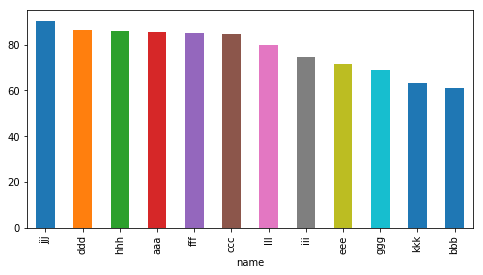

In [79]:
sorted_df = df.sort_values(['avg'], ascending=False)
sorted_df.index = sorted_df['name']
sorted_df['avg'].plot(kind='bar', figsize=(8, 4))

## 1.3) Class1반과 Class2반의 평균 점수를 각각 출력

In [93]:
class1 = df[df['class'] == 1]
class2 = df[df['class'] == 2]
class1_avg = class1['total_score'].sum() / (6 * 4)
class2_avg = class2['total_score'].sum() / (6 * 4)
print('-class1_avg :', class1_avg, '-class2_avg :',class2_avg)

-class1_avg : 79.04166666666667 -class2_avg : 77.125


## 1.4) Class1반과 Class2반 두 집단의 차이가 유의한지 p value 값 계산하기 

In [94]:
stats.ttest_ind(class1['avg'], class2['avg'])

Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)

p value > 0.005 이므로 두 집단이 차이가 없어보임. 즉 1반과 2반은 사실 유의한 점수차이가 없음

과목별로 차이가 있는지 확인

In [96]:
for subject in subjects:
    print(subject, stats.ttest_ind(class1[subject], class2[subject]))

kor Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
eng Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
math Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
science Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


과학 과목은 p value < 0.005. 차이가 많이 난다

class1과 class2의 과학에 대한 평균점수를 확인해보자

In [98]:
class1['science'].sum() / 6, class2['science'].sum() / 6

(94.83333333333333, 69.66666666666667)

## 2.1) class별 과목 분석

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


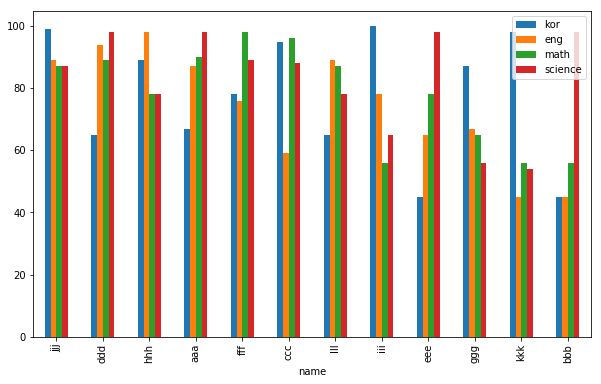

In [99]:
sorted_df[subjects].plot(kind='bar', figsize=(10, 6))

class1과 class2 각각 bosplot으로 확인

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


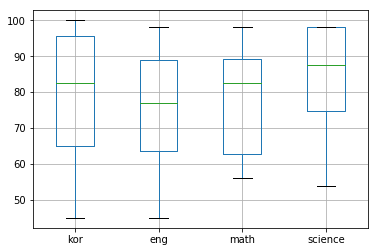

In [100]:
df[subjects].boxplot(return_type='axes')

class1의 boxplot 확인
--> 국어가 낮고, 과학을 잘함

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


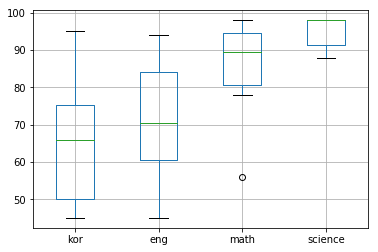

In [101]:
class1[subjects].boxplot(return_type='axes')

class2의 boxplot 확인 --> 국어를 잘하고, 과학을 못함

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


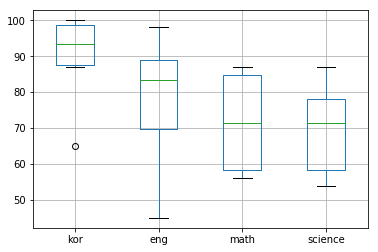

In [102]:
class2[subjects].boxplot(return_type='axes')

## 2.2) 과목별 상관도

보통 수학 점수가 높으면 과학 점수가 높을 것이라고 기대할 수 있다. 국어 점수가 높으면 영어 점수가 높을 것이라고도 기대할 수 있고. 이러한 상관도를 확인해보자

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


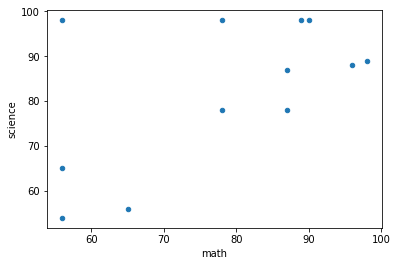

In [103]:
df.plot(kind='scatter', x='math', y='science')

수학점수가 높으면 과학점수도 높아 보인다. 어느정도 상관관계가 보인다. 얼마나 상관관계가 있을까? 

이렇때 상관계수를 구해볼 수가 있다. 피어슨 상관계수로 확인해보자. scipy의 stats 모듈에 함수가 있음.

In [104]:
stats.pearsonr(df['math'], df['science'])

(0.5632890597067751, 0.05650580486155532)

앞 숫자가 상관계수 뒷 숫자가 p-value를 의미. 상관계수가 0.5보다 높으므로, 관계가 있긴 하지만 p > 0.05 이므로,

유의한 상관관계가 있지는 않는다. 데이터가 좀 더 많아지면, p-value가 의미있어지는 경우가 많음. 이 경우는 데

이터 n수가 작아서 의미를 찾기 어려운 것 같다. 국어와 영어는 어떨까?

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


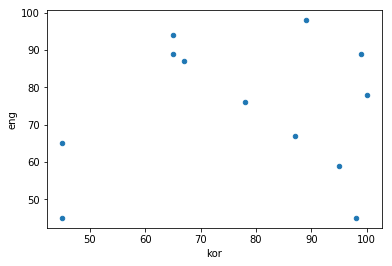

In [106]:
df.plot(kind='scatter', x='kor', y='eng')

In [105]:
stats.pearsonr(df['kor'], df['eng'])

(0.10566562777973997, 0.7437959551857836)

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


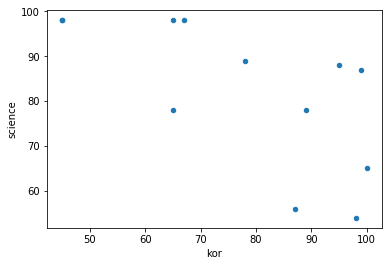

In [107]:
df.plot(kind='scatter', x='kor', y='science')

In [108]:
stats.pearsonr(df['kor'], df['science'])

(-0.6641304447132412, 0.01850195913942532)

## 3.1) 모든 학생들의 성적 패턴 분석

PCI : https://ko.wikipedia.org/wiki/주성분_분석

학생별로 어떤 학생은 수학을 잘하면서 과학을 잘하지만 영어는 약할 수 있고, 또 어떤 학생은 다른 패턴으로 잘하는 과목에 대한 특징이 있을 수 있다. 학생들끼리 이러한 성적 패턴이 얼마나 비슷한지 비교해 볼 수 있을까? 이를 확인할 수 있는 다양한 방법이 있다. 대표적인 방법으로 주성분분석 (Principle component analysis)이 있다. 학생별로 4과목이라는 특성을 두개로 축약한 후, 2차원 평면에 표시하면, 그 종합적인 차이를 한눈에 알 수 있다.

PCA 분석은 scikit-learn이라는 라이브러리를 설치하고 수행할 수 있다.

PCA 분석의 입력자료는 4과목의 성적데이터이다.


In [109]:
df[subjects]

,kor,eng,math,science
0,67,87,90,98
1,45,45,56,98
2,95,59,96,88
3,65,94,89,98
4,45,65,78,98
5,78,76,98,89
6,87,67,65,56
7,89,98,78,78
8,100,78,56,65
9,99,89,87,87


In [115]:
# Normalization

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df[subjects])
X_std

array([[-0.55809652,  0.72621778,  0.78954203,  1.01066629],
       [-1.70024754, -1.68176748, -1.44749373,  1.01066629],
       [ 0.89555023, -0.87910573,  1.18431305,  0.36897341],
       [-0.66192843,  1.12754865,  0.72374686,  1.01066629],
       [-1.70024754, -0.53510783,  0.        ,  1.01066629],
       [ 0.01297899,  0.09555497,  1.31590339,  0.43314269],
       [ 0.48022259, -0.42044187, -0.8553372 , -1.68444381],
       [ 0.5840545 ,  1.35688058,  0.        , -0.27271947],
       [ 1.15513001,  0.21022093, -1.44749373, -1.10692022],
       [ 1.10321405,  0.84088374,  0.59215653,  0.30480412],
       [ 1.0512981 , -1.68176748, -1.44749373, -1.81278239],
       [-0.66192843,  0.84088374,  0.59215653, -0.27271947]])

In [116]:
# PCI 라이브러리로 4과목(4차원)을 2차원으로 축약
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(X_std)
Y

array([[-1.56591653, -0.09168753],
       [ 0.11774518,  2.93515218],
       [-0.20727166, -0.38845514],
       [-1.71984653, -0.24234692],
       [-1.11185524,  1.70512415],
       [-1.03327136, -0.43547978],
       [ 1.88205338, -0.20323602],
       [-0.10118555, -1.27408337],
       [ 1.88020684, -0.64411706],
       [-0.39554448, -1.36047251],
       [ 2.98704605,  0.37256038],
       [-0.7321601 , -0.37295837]])

In [112]:
pca_df = pd.DataFrame(Y)
pca_df.index = df.index
pca_df.columns = ['PC1', 'PC2']
df2 = pd.concat([df, pca_df], axis=1)
df2

,class,name,kor,eng,math,science,total_score,avg,PC1,PC2
0,1,aaa,67,87,90,98,342,85.50,-1.565917,-0.091688
1,1,bbb,45,45,56,98,244,61.00,0.117745,2.935152
2,1,ccc,95,59,96,88,338,84.50,-0.207272,-0.388455
3,1,ddd,65,94,89,98,346,86.50,-1.719847,-0.242347
4,1,eee,45,65,78,98,286,71.50,-1.111855,1.705124
5,1,fff,78,76,98,89,341,85.25,-1.033271,-0.435480
6,2,ggg,87,67,65,56,275,68.75,1.882053,-0.203236
7,2,hhh,89,98,78,78,343,85.75,-0.101186,-1.274083
8,2,iii,100,78,56,65,299,74.75,1.880207,-0.644117
9,2,jjj,99,89,87,87,362,90.50,-0.395544,-1.360473


C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


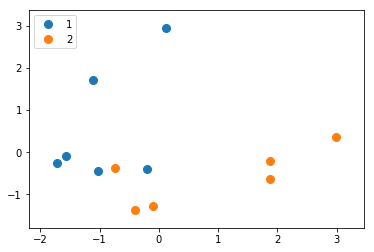

In [114]:
def draw_groups(groups, loc):
    fig, ax = plt.subplots()
    ax.margins(0.1)

    for name, group in groups:
        ax.plot(group['PC1'], group['PC2'], marker='o', linestyle='', ms=8, label=name)

    ax.legend(numpoints=1, loc=loc)
    
draw_groups(df2.groupby('class'), loc='upper left')

위 scatter plot에 의하면 PC1 < 0, PC2 <0 에 있는 7명의 학생이 어느 정도 비슷한 패턴을 갖는 것으로 보입니다. 이후, 교육 방침을 정하거나, 장래 희망 상담등을 할 때, 이 결과를 이용할 수 있을 것으로 보입니다